AIM:To develop a real-time gesture recognition and prediction system that captures hand gestures from a live camera feed, processes the images for feature extraction, and classifies gestures using a pre-trained machine learning model. This system facilitates intuitive interactions by recognizing gestures and can be extended to control external devices, enabling applications in human-computer interaction and assistive technology.


In [ ]:
import cv2,os

data_path="C:\\Users\\Hp\\OneDrive\\Desktop\\train"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'0': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [ ]:
data_path='C:\\Users\\Hp\\OneDrive\\Desktop\\train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [ ]:
data_path='C:\\Users\\Hp\\OneDrive\\Desktop\\train'

In [ ]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [ ]:
#print(labels_classes)
#print(categories)
print(label_classes_dict)

{'0': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


In [ ]:
import numpy as np

In [ ]:
import os
import cv2
import numpy as np

#image size and data path
img_size = 128
data = []
target = []
minValue = 70

#Categories and label mapping
categories = ['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
label_classes_dict = {category: i for i, category in enumerate(categories)}  # Map category labels to indices


data_path = r"C:\Users\Hp\OneDrive\Desktop\train"

print(f"Categories: {categories}")

for category in categories:
    cat_path = os.path.join(data_path, category)
    print(f"Processing category path: {cat_path}")

=    if not os.path.exists(cat_path):
        print(f"Category path does not exist: {cat_path}")
        continue

    img_names = os.listdir(cat_path)
    print(f"Image names found in {category}: {img_names}")

    for img_name in img_names:
        img_path = os.path.join(cat_path, img_name)
        print(f"Reading image path: {img_path}")

        # Check if the path is a file and if it's a valid image
        if not os.path.isfile(img_path):
            print(f"Not a valid file: {img_path}")
            continue

        img = cv2.imread(img_path)

        if img is None:
            print(f"Failed to read image: {img_path}")
            continue

        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            blur = cv2.GaussianBlur(gray, (5, 5), 2)
            th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
            ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

            resized = cv2.resize(res, (img_size, img_size))
            data.append(resized)

            # Use the category directly as the label
            target.append(label_classes_dict[category])  # This should now work without issues

        except Exception as e:
            print(f'Exception while processing image {img_name} in category {category}:', e)

# Convert data to a NumPy array and print the shape
datanp = np.array(data)
print("Number of images in data:", len(data))
print("Data shape:", datanp.shape)


Categories: ['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Processing category path: C:\Users\Hp\OneDrive\Desktop\train\0
Image names found in 0: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '116.jpg', '119.jpg', '12.jpg', '120.jpg', '122.jpg', '123.jpg', '125.jpg', '126.jpg', '127.jpg', '129.jpg', '13.jpg', '130.jpg', '132.jpg', '136.jpg', '137.jpg', '139.jpg', '14.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '146.jpg', '148.jpg', '150.jpg', '151.jpg', '152.jpg', '156.jpg', '157.jpg', '16.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '170.jpg', '171.jpg', '172.jpg', '173.jpg', '174.jpg', '175.jpg', '176.jpg', '177.jpg', '178.jpg', '179.jpg', '18.jpg', '180.jpg', '181.jpg', '183

In [ ]:
datanp=np.array(data)

In [ ]:
datanp.shape

(12845, 128, 128)

In [ ]:
targetnp=np.array(target)

targetnp.shape

(12845,)

In [ ]:
import numpy as np

# Normalize the data to [0, 1] range
data = np.array(data) / 255.0
data = np.reshape(data, (data.shape[0], img_size, img_size, 1))  # Reshape for grayscale images
target = np.array(target)

from keras.utils import to_categorical  # Updated import

# Convert target to categorical
new_target = to_categorical(target)  # Use to_categorical directly

print("Data shape:", data.shape)
print("Target shape:", new_target.shape)


Data shape: (12845, 128, 128, 1)
Target shape: (12845, 27)


In [ ]:
new_target.shape

(12845, 27)

In [ ]:
np.save('data_img',data)
np.save('target',new_target)

In [ ]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128



# Initializing the CNN
classifier = Sequential()

# Add an Input layer with the shape of your input images
classifier.add(Input(shape=(sz, sz, 1)))

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding fully connected layers
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 2 - Preparing the train/test data and training the model
classifier.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 96)                  │          12,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,716,443 (14.18 MB)

 Trainable params: 3,716,443 (14.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

# Train the model with the checkpoint callback
history = classifier.fit(train_data,
                         train_target,
                         shuffle=True,
                         epochs=50,
                         callbacks=[checkpoint],
                         validation_split=0.3)
#from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define checkpoint to save the best model
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto')

''' Optional early stopping
 early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

 Train the model with the checkpoint and early stopping callbacks
 history = classifier.fit(train_data,
                         train_target,
                         shuffle=True,
                         epochs=50,
                         callbacks=[checkpoint, early_stopping],
                         validation_split=0.3)'''


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.1457 - loss: 2.9353 - val_accuracy: 0.8741 - val_loss: 0.5976
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.6485 - loss: 1.0758 - val_accuracy: 0.9692 - val_loss: 0.1523
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.7960 - loss: 0.5956 - val_accuracy: 0.9873 - val_loss: 0.0679
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.8659 - loss: 0.3775 - val_accuracy: 0.9977 - val_loss: 0.0208
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.8951 - loss: 0.3209 - val_accuracy: 0.9958 - val_loss: 0.0172
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9114 - loss: 0.2579 - val_accuracy: 0.9974 - val_loss: 0.0146
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.9188 - loss: 0.2412 - val_accuracy: 0.9990 - val_loss: 0.0107
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9277 - loss: 0

In [ ]:
print(classifier.evaluate(test_data,test_target))

81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9988 - loss: 0.0059
[0.008587782271206379, 0.9984429478645325]


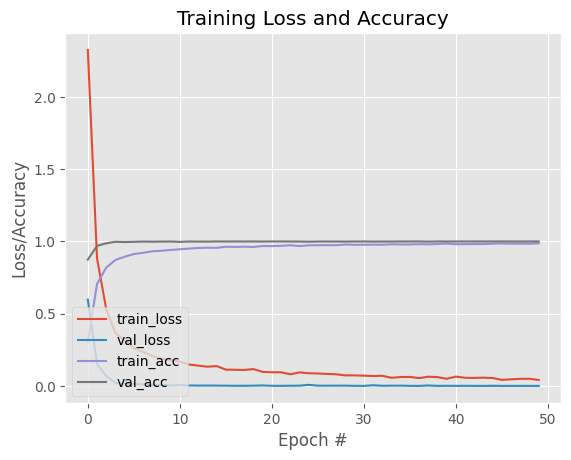

In [ ]:
import matplotlib.pyplot as plt
N = 50
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

In [ ]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
classifier.save("asl_classifier50.keras")
print("Done !")

[INFO] saving mask detector model...
Done !


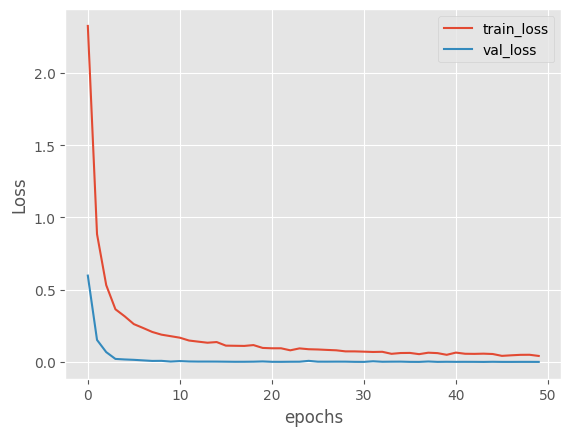

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

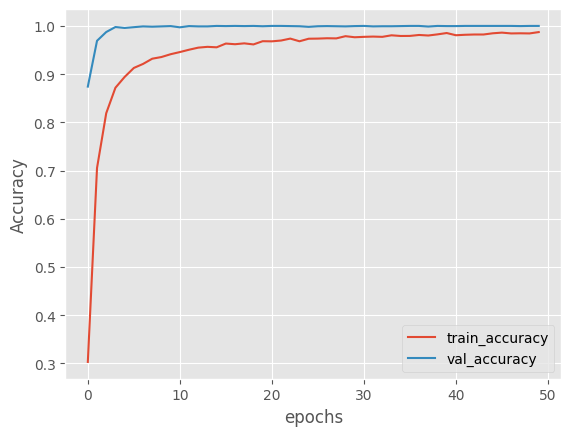

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()